## Welcome to the CMD activity!

In this activity, you will be making your own color magnitude diagram of the stars in Andromeda targeted by the SPLASH survey.

As usual with Jupyter, begin by importing the packages you'll be needing by clicking on the first cell and pressing Shift+Enter. For this activity, you'll only be needing numpy and matplotlib.

In [2]:
# This clones your repo and sets the directory so the notebooks can find the 'data' folder
import os

repo_url = "https://github.com/SalmaLilad/UCSC-PYaR-Research"
repo_name = "UCSC-PYaR-Research"

if not os.path.exists(repo_name):
    !git clone {repo_url}

# Move the working directory into the 'programs' folder so file paths like '../data/' work
os.chdir(f"{repo_name}/programs")

print(f"Current working directory: {os.getcwd()}")

Cloning into 'UCSC-PYaR-Research'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 82 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (82/82), 629.47 KiB | 5.72 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Current working directory: /content/UCSC-PYaR-Research/programs/UCSC-PYaR-Research/programs


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

This next cell is my preferred setting for making plots; I like big font and serifs! Feel free to change if you have a different preference!

In [4]:
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

This function initializes the CMD plot and labels the axes. No data is plotted in this function. You don't need to modify this function.

In [5]:
def InitializePlot():
    plt.clf()
    f= plt.figure(figsize=(8,8))
    plt.xlim(-1, 9)
    plt.ylim(24, 18)
    plt.xlabel('F475W - F814W (mag)')
    plt.ylabel('F814W (mag)')

This function writes a catalog. It takes as arguments the name of the file,  the different quantities you want to put in the catalog, and the names of these quantities. You do not need to modify this function.

In [6]:
def WriteCatalog(catalogName, params, paramNameString):
    #first, create and open the text file for writing. Choose a name:
    catalog = open(catalogName, 'w')

    #write first row
    catalog.write('# ' + paramNameString + '\n')

    #then, loop through stars and write 1 row for each star.
    for i in range(len(params[0])): #loop over stars
        for j in range(len(params)): #loop over parameters (ra, dec, v, verr,...)
            catalog.write(str(params[j][i]))
            catalog.write(' ')
        catalog.write('\n')
    catalog.close()

    return

Okay, now that we have all our packages imported, we are ready to get to the science! The first thing we need to do is read in the file that contains all our data. This file contains the coordinates (ra, dec, xi, eta), the magnitudes (in two different bandpasses), and the velocities of all our stars (we will talk more about velocities next!).

As we discussed, the color of the star is a very useful and important quantity; we define the array for "color" below.

In [7]:
ra, dec, xi, eta, f475w, f814w, v, verr = np.loadtxt('../data/keck_hst_data.txt', unpack = True)
color = f475w - f814w

Now we can plot a color magnitude diagram of all the objects in our sample:

<Figure size 640x480 with 0 Axes>

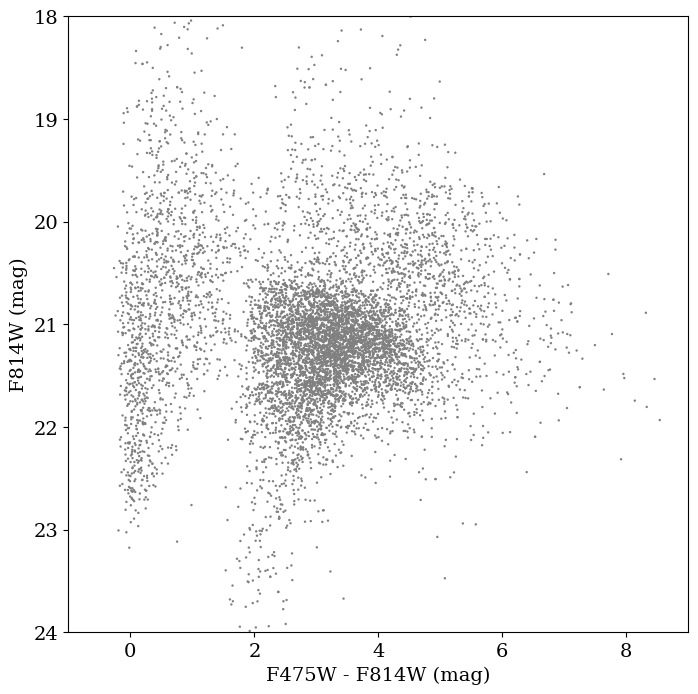

In [8]:
f = InitializePlot()
plt.scatter(color, f814w, c = 'gray', s = 3, edgecolors = 'none')

Now that we have our CMD, we want to separate out the stars of different types: main sequence (MS) stars, red giant branch (RGB) stars, and asymptotic giant branch (AGB) stars. The below cell selects the main sequence stars and plots them in blue on top of the CMD. It then writes a catalog in your "data" folder that contains the information only for the MS stars.

What you'll be doing is adapting and adding to the code below to do the same for the RGB and AGB stars. You want to color code the RGB and AGB stars on the plot, add the labels "AGB" and "RGB" to the plot, and write the RGB and AGB catalogs.

First run the cell to see the plot produced. Then, "uncomment" (meaning remove the lines with # signs--the # sign tells Python not to run the line) the line that begins "rgb=" and replace a, h, and k with numbers. To decide what numbers to choose, use the "DividedCMD" figure in your "plots" folder for inspiration. Plot your selected RGB stars, and then do the same for the AGB stars.

<Figure size 640x480 with 0 Axes>

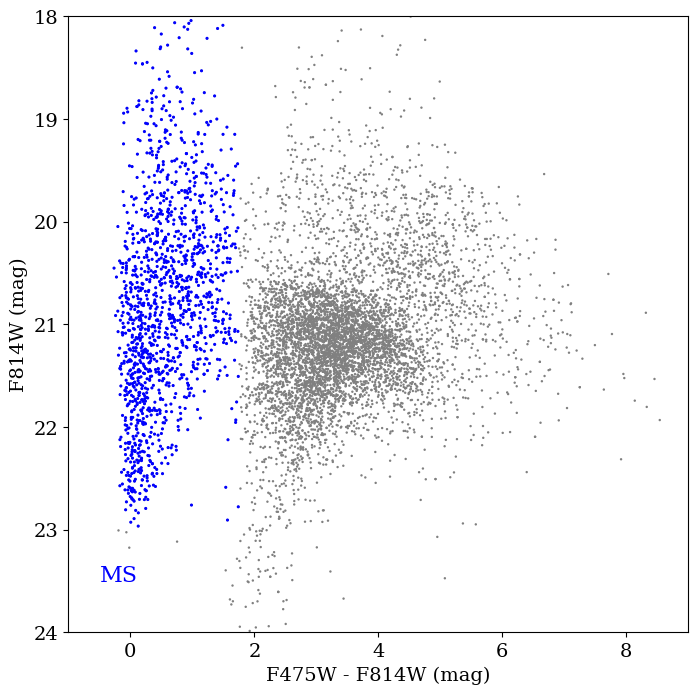

In [9]:
#========From here on is the part that you're going to copy and
#adapt for the RGB and AGB stars===============================

#Where condition to isolate main sequence stars
ms = (color < 1.75) & (f814w < 23)

#Plot MS stars in blue on the plot and label that region
f = InitializePlot()
plt.scatter(color, f814w, c = 'gray', s = 3, edgecolors = 'none')
plt.scatter(color[ms], f814w[ms], c = 'blue', edgecolors = 'none', s = 5)
plt.text(-0.5, 23.5, 'MS', color = 'blue', size = 16)

#Write a text file containing information for MS stars by calling the
#WriteCatalog function on the stars that satisfy the MS condition.
#You shouldn't modify the WriteCatalog function itself;
#only copy and modify the line below for the AGB and RGB groups.
WriteCatalog('../data/MScatalog.txt',
             [ra[ms], dec[ms], xi[ms], eta[ms], f475w[ms], f814w[ms], v[ms], verr[ms]],
             'RA DEC XI ETA F475W F814W V VERR')

#==============================================================
#Replace a, h, and k with numbers, and see what happens
#rgb= (color > 1.75 ) & (f814w > a*(color-h)**2.+k)
##Add the RGB stars to the plot!

#Write the catalog here when you're happy with your selection!
#Then, add the AGB stars to the plot and write an AGB catalog as well!
#==============================================================


In [10]:
# Determine what fraction of the entire catalog are selected by the MS, RGB, and AGB criteria
nstars = len(color)
print('Fraction of stars on the MS: {0:.3f}'.format(np.sum(ms)/nstars))
print('Fraction of stars on the RGB: {0:.3f}'.format(np.sum(rgb)/nstars))
print('Fraction of stars on the AGB: {0:.3f}'.format(np.sum(agb)/nstars))
selected = ms | rgb | agb
print('Fraction of stars not selected: {0:.3f}'.format(np.sum(~selected)/nstars))

Fraction of stars on the MS: 0.155


NameError: name 'rgb' is not defined